In [1]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# data normalization
mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

In [4]:
class MyReluActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(MyReluActivation, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [5]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        kernel_shape = [int(input_shape[-1]), self.num_outputs]
        self.kernel = self.add_weight("kernel", shape=kernel_shape)

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

In [6]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(MyDenseLayer(128))
model.add(MyReluActivation())
model.add(MyDenseLayer(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_layer (MyDenseLaye  (None, 128)              100352    
 r)                                                              
                                                                 
 my_relu_activation (MyReluA  (None, 128)              0         
 ctivation)                                                      
                                                                 
 my_dense_layer_1 (MyDenseLa  (None, 10)               1280      
 yer)                                                            
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
__________________________________________________

In [7]:
# optimizer and loss
opt = tf.keras.optimizers.SGD(0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
batch_size = 256
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
235/235 - 1s - loss: 1.8608 - sparse_categorical_accuracy: 0.3626 - val_loss: 1.2712 - val_sparse_categorical_accuracy: 0.5710 - 1s/epoch - 6ms/step
Epoch 2/300
235/235 - 1s - loss: 1.0880 - sparse_categorical_accuracy: 0.6377 - val_loss: 0.9811 - val_sparse_categorical_accuracy: 0.6697 - 970ms/epoch - 4ms/step
Epoch 3/300
235/235 - 1s - loss: 0.9031 - sparse_categorical_accuracy: 0.6953 - val_loss: 0.8644 - val_sparse_categorical_accuracy: 0.7040 - 911ms/epoch - 4ms/step
Epoch 4/300
235/235 - 1s - loss: 0.8128 - sparse_categorical_accuracy: 0.7240 - val_loss: 0.7964 - val_sparse_categorical_accuracy: 0.7248 - 957ms/epoch - 4ms/step
Epoch 5/300
235/235 - 1s - loss: 0.7558 - sparse_categorical_accuracy: 0.7427 - val_loss: 0.7506 - val_sparse_categorical_accuracy: 0.7396 - 996ms/epoch - 4ms/step
Epoch 6/300
235/235 - 1s - loss: 0.7154 - sparse_categorical_accuracy: 0.7552 - val_loss: 0.7167 - val_sparse_categorical_accuracy: 0.7497 - 1s/epoch - 5ms/step
Epoch 7/300
235/235 - 

Epoch 52/300
235/235 - 1s - loss: 0.4443 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.4795 - val_sparse_categorical_accuracy: 0.8315 - 1s/epoch - 5ms/step
Epoch 53/300
235/235 - 1s - loss: 0.4428 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4781 - val_sparse_categorical_accuracy: 0.8322 - 1s/epoch - 5ms/step
Epoch 54/300
235/235 - 1s - loss: 0.4414 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4769 - val_sparse_categorical_accuracy: 0.8321 - 1s/epoch - 5ms/step
Epoch 55/300
235/235 - 1s - loss: 0.4399 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.4755 - val_sparse_categorical_accuracy: 0.8330 - 1s/epoch - 4ms/step
Epoch 56/300
235/235 - 1s - loss: 0.4385 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.4745 - val_sparse_categorical_accuracy: 0.8325 - 1s/epoch - 5ms/step
Epoch 57/300
235/235 - 1s - loss: 0.4372 - sparse_categorical_accuracy: 0.8470 - val_loss: 0.4734 - val_sparse_categorical_accuracy: 0.8329 - 977ms/epoch - 4ms/step
Epoch 58/300
235/235 - 1s

Epoch 103/300
235/235 - 1s - loss: 0.3945 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.4377 - val_sparse_categorical_accuracy: 0.8447 - 1s/epoch - 5ms/step
Epoch 104/300
235/235 - 1s - loss: 0.3938 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.4370 - val_sparse_categorical_accuracy: 0.8456 - 1s/epoch - 4ms/step
Epoch 105/300
235/235 - 1s - loss: 0.3932 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.4365 - val_sparse_categorical_accuracy: 0.8450 - 1s/epoch - 5ms/step
Epoch 106/300
235/235 - 1s - loss: 0.3925 - sparse_categorical_accuracy: 0.8629 - val_loss: 0.4363 - val_sparse_categorical_accuracy: 0.8452 - 917ms/epoch - 4ms/step
Epoch 107/300
235/235 - 1s - loss: 0.3919 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.4354 - val_sparse_categorical_accuracy: 0.8457 - 766ms/epoch - 3ms/step
Epoch 108/300
235/235 - 1s - loss: 0.3912 - sparse_categorical_accuracy: 0.8632 - val_loss: 0.4353 - val_sparse_categorical_accuracy: 0.8455 - 887ms/epoch - 4ms/step
Epoch 109/300

235/235 - 1s - loss: 0.3681 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4169 - val_sparse_categorical_accuracy: 0.8522 - 1s/epoch - 5ms/step
Epoch 154/300
235/235 - 1s - loss: 0.3677 - sparse_categorical_accuracy: 0.8705 - val_loss: 0.4164 - val_sparse_categorical_accuracy: 0.8529 - 1s/epoch - 5ms/step
Epoch 155/300
235/235 - 1s - loss: 0.3673 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.4161 - val_sparse_categorical_accuracy: 0.8527 - 1s/epoch - 5ms/step
Epoch 156/300
235/235 - 1s - loss: 0.3668 - sparse_categorical_accuracy: 0.8712 - val_loss: 0.4160 - val_sparse_categorical_accuracy: 0.8527 - 1s/epoch - 4ms/step
Epoch 157/300
235/235 - 1s - loss: 0.3664 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.4155 - val_sparse_categorical_accuracy: 0.8533 - 1s/epoch - 5ms/step
Epoch 158/300
235/235 - 1s - loss: 0.3660 - sparse_categorical_accuracy: 0.8711 - val_loss: 0.4152 - val_sparse_categorical_accuracy: 0.8532 - 1s/epoch - 4ms/step
Epoch 159/300
235/235 - 1s - loss: 0

Epoch 204/300
235/235 - 1s - loss: 0.3495 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.8571 - 1s/epoch - 4ms/step
Epoch 205/300
235/235 - 1s - loss: 0.3491 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.4023 - val_sparse_categorical_accuracy: 0.8588 - 1s/epoch - 4ms/step
Epoch 206/300
235/235 - 1s - loss: 0.3488 - sparse_categorical_accuracy: 0.8769 - val_loss: 0.4022 - val_sparse_categorical_accuracy: 0.8593 - 1s/epoch - 4ms/step
Epoch 207/300
235/235 - 1s - loss: 0.3485 - sparse_categorical_accuracy: 0.8768 - val_loss: 0.4020 - val_sparse_categorical_accuracy: 0.8581 - 1s/epoch - 4ms/step
Epoch 208/300
235/235 - 1s - loss: 0.3482 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.4018 - val_sparse_categorical_accuracy: 0.8604 - 1s/epoch - 4ms/step
Epoch 209/300
235/235 - 1s - loss: 0.3479 - sparse_categorical_accuracy: 0.8772 - val_loss: 0.4019 - val_sparse_categorical_accuracy: 0.8593 - 1s/epoch - 4ms/step
Epoch 210/300
235/235 

Epoch 255/300
235/235 - 1s - loss: 0.3350 - sparse_categorical_accuracy: 0.8817 - val_loss: 0.3923 - val_sparse_categorical_accuracy: 0.8638 - 1s/epoch - 4ms/step
Epoch 256/300
235/235 - 1s - loss: 0.3347 - sparse_categorical_accuracy: 0.8824 - val_loss: 0.3922 - val_sparse_categorical_accuracy: 0.8633 - 1s/epoch - 4ms/step
Epoch 257/300
235/235 - 1s - loss: 0.3344 - sparse_categorical_accuracy: 0.8824 - val_loss: 0.3922 - val_sparse_categorical_accuracy: 0.8621 - 1s/epoch - 4ms/step
Epoch 258/300
235/235 - 1s - loss: 0.3342 - sparse_categorical_accuracy: 0.8823 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8634 - 1s/epoch - 4ms/step
Epoch 259/300
235/235 - 1s - loss: 0.3339 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.3915 - val_sparse_categorical_accuracy: 0.8627 - 1s/epoch - 4ms/step
Epoch 260/300
235/235 - 1s - loss: 0.3337 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.8621 - 1s/epoch - 4ms/step
Epoch 261/300
235/235 

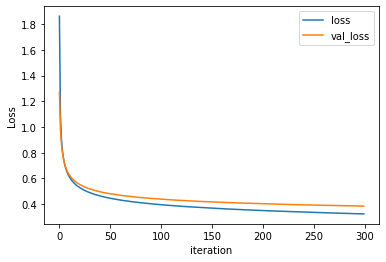

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

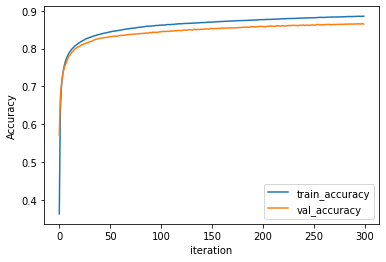

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
model.evaluate(X_test, y_test, batch_size)

40/40 [==============================] - 0s 3ms/step - loss: 0.3851 - sparse_categorical_accuracy: 0.8647


[0.38506269454956055, 0.8647000193595886]